## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [251]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

### You Try - 4 Warm-Up Problems From Lecture

## You try

What does frame.unstack() do in this case. Go ahead and run the command and see if you can understand the results.

In [254]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                     columns=[["Ohio", "Ohio", "Colorado"],
                              ["Green", "Red", "Green"]])
frame.index.names = ["key1", "key2"]
frame.columns.names = ["state", "color"]

frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [256]:
# Your code here
frame.unstack()

#The unstack function essentially combines multiple layers. It moves multiple columns and combines them to one
#column label. In other words, it moves the outer level of the row and the intter/outer levels of columns to become 
# inner rows. 

state  Ohio            Colorado    
color Green    Red        Green    
key2      1  2   1   2        1   2
key1                               
a         0  3   1   4        2   5
b         6  9   7  10        8  11

-------------------------------------
## You Try

How would you swap the index keys? See if you can swap key1 and key2 in the new_frame.


In [259]:
new_frame = frame.swaplevel('state','color', axis=1)
new_frame

color     Green  Red    Green
state      Ohio Ohio Colorado
key1 key2                    
a    1        0    1        2
     2        3    4        5
b    1        6    7        8
     2        9   10       11

In [261]:
# Your code here
# If axis = 1 is for columns axis = 0 is for rows. and Key 1 and key 2 represent inner/outer rows.
new_frame = frame.swaplevel('key2','key1', axis=0)
display(new_frame)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

-------------------------------------------------------
## You Try

Merge the following data sets using all for ways: inner, left, right, and outer. See if you can predict before running the code what the output will be!

In [264]:
df_animals = pd.DataFrame({
    'animal_id': [1, 2, 3, 4],
    'name': ['Leo', 'Stripes', 'Spot', 'Fluffy'],
    'type': ['Lion', 'Tiger', 'Cheetah', 'Cat']
})

df_habitats = pd.DataFrame({
    'animal_id': [1, 2, 5, 4],
    'habitat': ['Savannah', 'Jungle', 'Mountains', 'Domestic'],
    'population_estimate': [25000, 3200, 120, 50000000]
})

display(df_animals)
display(df_habitats)

,animal_id,name,type
0,1,Leo,Lion
1,2,Stripes,Tiger
2,3,Spot,Cheetah
3,4,Fluffy,Cat


,animal_id,habitat,population_estimate
0,1,Savannah,25000
1,2,Jungle,3200
2,5,Mountains,120
3,4,Domestic,50000000


In [266]:
## Your Prediction
#For Inner, I predict only things that reapeat once for the animal ID will appear. So numbers 1,2,4.

#For Left, it is a left merge, so df habitats will be merged with df_animals. Whatever ID is on df_ animals will appear. 

#For right, it is a right merge, so df_animals will be merged with df_habitats. Whatever ID is on df_habitats will appear. 

#For outer, it is the least restrictive and it just merges both dataframes. I expect to see 5 animals. 

In [268]:
## Your code
display(pd.merge(df_animals, df_habitats, on='animal_id', how='inner'))

,animal_id,name,type,habitat,population_estimate
0,1,Leo,Lion,Savannah,25000
1,2,Stripes,Tiger,Jungle,3200
2,4,Fluffy,Cat,Domestic,50000000


In [270]:
## Repeat for left, right, outer
display(pd.merge(df_animals, df_habitats, on='animal_id', how='left'))

,animal_id,name,type,habitat,population_estimate
0,1,Leo,Lion,Savannah,25000.0
1,2,Stripes,Tiger,Jungle,3200.0
2,3,Spot,Cheetah,NaN,NaN
3,4,Fluffy,Cat,Domestic,50000000.0


In [272]:
display(pd.merge(df_animals, df_habitats, on='animal_id', how='right'))

,animal_id,name,type,habitat,population_estimate
0,1,Leo,Lion,Savannah,25000
1,2,Stripes,Tiger,Jungle,3200
2,5,NaN,NaN,Mountains,120
3,4,Fluffy,Cat,Domestic,50000000


In [273]:
display(pd.merge(df_animals, df_habitats, on='animal_id', how='outer'))

,animal_id,name,type,habitat,population_estimate
0,1,Leo,Lion,Savannah,25000.0
1,2,Stripes,Tiger,Jungle,3200.0
2,3,Spot,Cheetah,NaN,NaN
3,4,Fluffy,Cat,Domestic,50000000.0
4,5,NaN,NaN,Mountains,120.0


-------------------------------
## You Try

Do a pivot on your merged animal data. You can decide how to pivot, but try to say before running the code what you expect to happen.

In [277]:
#Prediction

#Before running this code, I want month to be column, and person to be my first row. Then following that I believe sales and expenses
#will create a heirarchy above the person, not the month. 

In [279]:
# Your code here
df = pd.DataFrame({
    'person': ['Alice', 'Alice', 'Bob', 'Bob'],
    'month': ['Jan', 'Feb', 'Jan', 'Feb'],
    'sales': [200, 180, 210, 190],
    'expenses': [150, 120, 160, 140]
})

pivoted = df.pivot(index='month',columns='person', values=['sales','expenses'])
display(pivoted)

#Ask Dr. Bieri how to go from melted data where sales/expenses are together, to seperating them. 

sales      expenses     
person Alice  Bob    Alice  Bob
month                          
Feb      180  190      120  140
Jan      200  210      150  160

---------------
## Data Wrangling - Day5 HW

## Homework 5

Using all three datasets below we would like to determine if the usage patterns for users differ between different devices. See if you can ask some questions of your own. Here are some examples:

1. Does the platform being used impact the number of monthly mb used? 
2. Do users using Samsung devices use more call minutes than those using LGE devices? 

Idea from: https://www.kaggle.com/code/vin1234/merge-join-and-concat-with-pandas
Author: Vinay Vikram

- Looking at the data what columns can be used for merging? Do you see any you might need/want to rename?
- Make sure to say what you are doing in the merge and why you are choosing the specific merge type.
- Explain in detail your approach to answering the question, there is more than one right answer!
    
------------------------------------

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day5 stuff in it: Read in the data, merge it, answer a minimum of 3 questions. 
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.


In [282]:
user_usage=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_usage.csv')
user_usage.head(10)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
5,71.59,79.26,1557.33,22793
6,71.59,79.26,519.12,22794
7,71.59,79.26,519.12,22795
8,30.92,22.77,3114.67,22799
9,69.80,14.70,25955.55,22801


In [283]:
user_device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/user_device.csv')
user_device.head(10)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
5,22787,12921,android,4.3,GT-I9505,1
6,22788,28714,android,6.0,SM-G930F,1
7,22789,28714,android,6.0,SM-G930F,1
8,22790,29592,android,5.1,D2303,1
9,22791,28775,ios,10.2,"iPhone6,2",3


In [285]:
device=pd.read_csv('https://raw.githubusercontent.com/shanealynn/Pandas-Merge-Tutorial/master/android_devices.csv')
device.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


# Merging the Data frames
### First I will use an inner merge to merge the two datasets: user_usage and user_device. I decided to use an inner merge because I am only interested in user_id's that appear in both datasets. I was going to use outer but the flexibility it provides was not very appealing to me. After I merge both these datasets, I will merge it with the device dataset using another inner merge but with the Index device. 

In [289]:
#Merging user_usage and User_device using inner merge
two_of_three = pd.merge(user_usage, user_device, on='use_id', how='inner')
display(two_of_three)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921,android,4.3,GT-I9505,1
1,1710.08,136.88,7267.55,22788,28714,android,6.0,SM-G930F,1
2,1710.08,136.88,7267.55,22789,28714,android,6.0,SM-G930F,1
3,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1
4,71.59,79.26,1557.33,22792,28217,android,5.1,SM-G361F,1
...,...,...,...,...,...,...,...,...,...
154,198.59,90.49,5191.12,23043,28953,android,6.0,SM-G900F,1
155,198.59,90.49,3114.67,23044,28953,android,6.0,SM-G900F,1
156,106.65,82.13,5191.12,23046,29454,android,6.0,Moto G (4),1
157,344.53,20.53,519.12,23049,29725,android,6.0,SM-G900F,1


In [291]:
#This is not junk code. I have it here for reference because it was very useful to have a side by side comparison of the column
#names so that I can rename with ease. 

two_of_three.columns.tolist
print('###########')
device.columns.tolist

###########


<bound method IndexOpsMixin.tolist of Index(['Retail Branding', 'Marketing Name', 'Device', 'Model'], dtype='object')>

In [293]:
# Merging our dataset with two of the three dataframes to our final dataset. 
device.rename(columns = {'Device' :'device'}, inplace = True)

final_df = pd.merge(two_of_three, device, 
        left_on='device', right_on='device', how = 'inner')

display(final_df)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id,Retail Branding,Marketing Name,Model
0,94.46,35.17,519.12,22790,29592,android,5.1,D2303,1,Sony,Xperia M2,D2303
1,283.30,107.47,15573.33,22806,21615,android,6.0,A0001,1,OnePlus,OnePlus One,A0001
2,283.30,107.47,15573.33,22806,21615,android,6.0,A0001,1,OnePlus,OnePlus One,One
3,244.88,105.95,1557.33,22832,29295,android,6.0,D5803,1,Sony,Xperia Z3 Compact,D5803
4,135.09,42.02,5191.12,22833,24847,android,6.0,E6653,1,Sony,Xperia Z5,E6653
5,57.49,16.73,15573.33,22839,29655,android,6.0,A0001,1,OnePlus,OnePlus One,A0001
6,57.49,16.73,15573.33,22839,29655,android,6.0,A0001,1,OnePlus,OnePlus One,One
7,99.23,35.58,519.12,22854,29592,android,5.1,D2303,1,Sony,Xperia M2,D2303
8,43.03,0.47,2076.45,22882,29666,android,6.0,F3111,1,Sony,Xperia XA,F3111
9,43.03,0.47,2076.45,22883,29666,android,6.0,F3111,1,Sony,Xperia XA,F3111


# Three Questions
## 1] Which device(s) are highly favored by Android Users?

#### After making a bar graph, it's clear that the android device that consumers tend to use the most (in terms of storage) is A0001. This may be because the device has an enhanced user experience, or it could be because the device is outdated and uses more storage to do simple tasks. Following the A0001, we have X11 which was a close second. The gap betwen X11 and D6603 devices widens substantially. Overall, it is clear that Android users tend to use more memory storage on the A0001, X11, and D6603 devices.

In [296]:
import matplotlib.pyplot as plt
import plotly.express as px

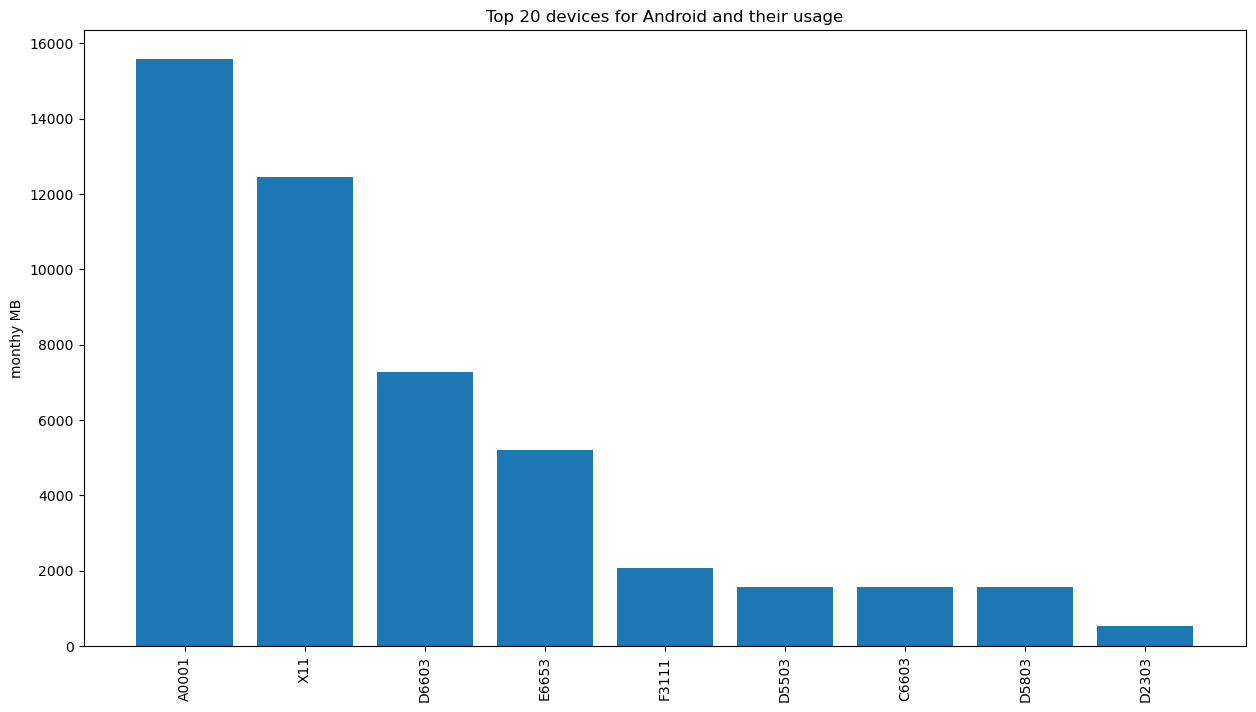

In [298]:
top = final_df[['device','monthly_mb']].sort_values(by='monthly_mb', ascending = False).head(20)

plt.figure(figsize=(15,8))
plt.bar(top['device'], top['monthly_mb'])

plt.title("Top 20 devices for Android and their usage")
plt.ylabel("monthy MB")
plt.xticks(rotation=90)
plt.show()

## 2] Does higher data usage mean more outgoing mins per month?

#### The correlation between data usage and outgoing minutes per month is approximately 0.20. This means that their is a positive relationship between data usage and the outgoing minutes per month but this relationship is weak. Because of such a weak correlation, we cannot indicate that higher data usage = higher outgoing mins per month. To get a better sense of this relationship, I made a graph and it became clear that we have the following problems: First, our sample size is too small. When merging the datasets I used only an inner merge but all that did was weed down my observations. Second, we lack platform variability. Out data is currently heavily skewed towards android. Finally, from the graph we cannot conclude that any relationship exist because the values appear to be random. 

In [300]:
final_df['monthly_mb'].corr(final_df['outgoing_mins_per_month'])

0.19575729312925833

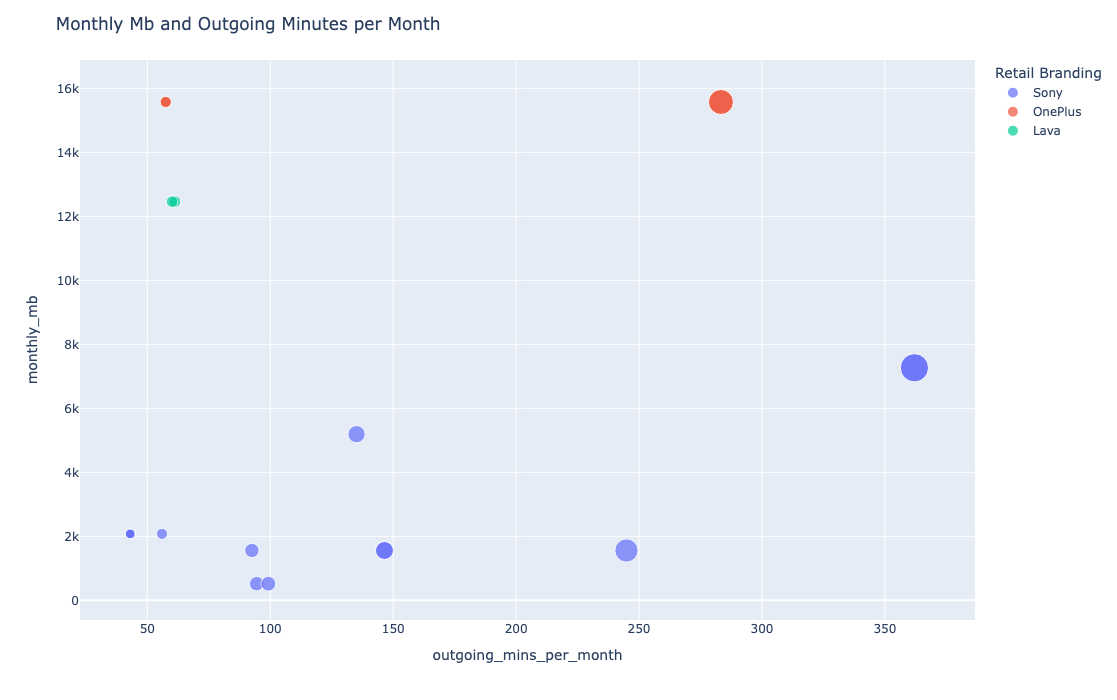

In [303]:
fig = px.scatter(final_df, x="outgoing_mins_per_month", y="monthly_mb", color="Retail Branding", size = 'outgoing_mins_per_month')  

fig.update_layout (
    title_text = "Monthly Mb and Outgoing Minutes per Month",
    height = 700
 )
fig.show()


## 3] What brand appears the most for indivduals in the top 5 data (mb) usage?

#### It appears that their is a diverse range of competition when it comes to retail branding. This is not unexpected because each brand has its own competitve advantage to attract users and incentivise them to use their devices. Overall, it seems that there is not a definite top 3 retail brand. Also, I cannot figure out why I only got top(3) instead of top(5). I believe I am grouping correctly, and their also exists no NaN values when doing summary statistics.

In [306]:
columns_focus = ['Retail Branding','monthly_mb']
top_mb = final_df[columns_focus].groupby('Retail Branding').sum().sort_values('monthly_mb', ascending=False).head(5)
top_mb

,monthly_mb
Retail Branding,
OnePlus,62293.32
Sony,35299.58
Lava,24917.34


In [308]:
#No Nan
final_df.isna().sum()

outgoing_mins_per_month    0
outgoing_sms_per_month     0
monthly_mb                 0
use_id                     0
user_id                    0
platform                   0
platform_version           0
device                     0
use_type_id                0
Retail Branding            0
Marketing Name             0
Model                      0
dtype: int64

In [310]:
#Correct Data types
final_df.dtypes

outgoing_mins_per_month    float64
outgoing_sms_per_month     float64
monthly_mb                 float64
use_id                       int64
user_id                      int64
platform                    object
platform_version           float64
device                      object
use_type_id                  int64
Retail Branding             object
Marketing Name              object
Model                       object
dtype: object